# Objective: Identify malicious transactions
- True Positive: Actually bad and is flagged as bad (DESIRED)
- True Negative: Actually good and is not flagged as bad (DESIRED)
- False Negative: Actually bad and not flagged as bad 
- False Positive: Actually good and is flagged as bad 

In [1]:
#import necessary functions
from combined import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Varying number of transactions


In [2]:
#collect and organize data 
num_data_items = 8
min_ops_per_transaction = 3
max_ops_per_transaction = 5

starting_index = 100
increment_amount = 50
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=num_data_items, num_transactions=starting_index+i*increment_amount, min_ops_per_transaction=min_ops_per_transaction, max_ops_per_transaction=max_ops_per_transaction))
    x_axis_values.append(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

#statistics for defined
defined_accuracies = []
defined_precisions = []
defined_recalls = []
defined_F1s = []

for i in range(num_groupings):
    good_nonflagged = defined_good_nonflagged[i]
    good_flagged = defined_good_flagged[i]
    bad_nonflagged = defined_bad_nonflagged[i]
    bad_flagged = defined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if (isinstance(recall, float)) and (isinstance(precision, float)):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    defined_accuracies.append(accuracy)
    defined_precisions.append(precision)
    defined_recalls.append(recall)
    defined_F1s.append(F1)

#statistics for defined
predefined_accuracies = []
predefined_precisions = []
predefined_recalls = []
predefined_F1s = []

for i in range(num_groupings):
    good_nonflagged = predefined_good_nonflagged[i]
    good_flagged = predefined_good_flagged[i]
    bad_nonflagged = predefined_bad_nonflagged[i]
    bad_flagged = predefined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if (isinstance(recall, float)) and (isinstance(precision, float)):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    predefined_accuracies.append(accuracy)
    predefined_precisions.append(precision)
    predefined_recalls.append(recall)
    predefined_F1s.append(F1)

Pre-Defined:
True Negatives: [92, 135, 181, 231, 273, 318]
False Positives: [3, 7, 9, 7, 12, 14]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [5, 8, 10, 12, 15, 18]

Dynamically Defined:
True Negatives: [95, 142, 190, 238, 285, 332]
False Positives: [0, 0, 0, 0, 0, 0]
False Negatives: [5, 8, 10, 12, 15, 18]
True Positives: [0, 0, 0, 0, 0, 0]


Statistics for Predefined
    Accuracies: [0.97, 0.95, 0.95, 0.97, 0.96, 0.96]
    Precisions: [0.62, 0.53, 0.53, 0.63, 0.56, 0.56]
    Recalls: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
    F1's: [0.77, 0.69, 0.69, 0.77, 0.72, 0.72]
Actual values in graph:
    True Negatives: [92, 135, 181, 231, 273, 318]
    False Positives: [3, 7, 9, 7, 12, 14]
    False Negatives: [0, 0, 0, 0, 0, 0]
    True Positives: [5, 8, 10, 12, 15, 18]


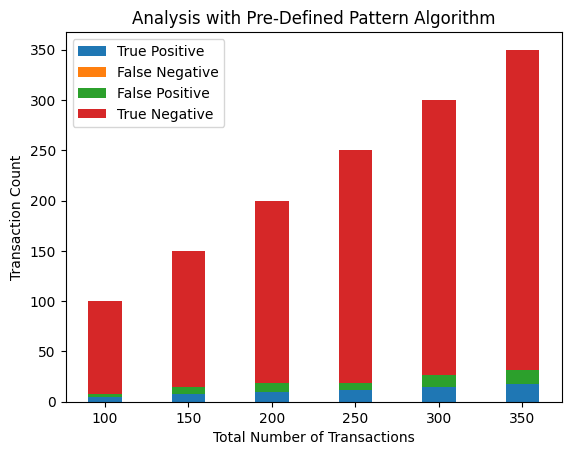

Statistics for Dynamically-Defined
    Accuracies: [0.95, 0.95, 0.95, 0.95, 0.95, 0.95]
    Precisions: ['NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0']
    Recalls: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    F1's: ['NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0', 'NA, divide by 0']
Actual values in graph:
    True Negatives: [95, 142, 190, 238, 285, 332]
    False Positives: [0, 0, 0, 0, 0, 0]
    False Negatives: [5, 8, 10, 12, 15, 18]
    True Positives: [0, 0, 0, 0, 0, 0]


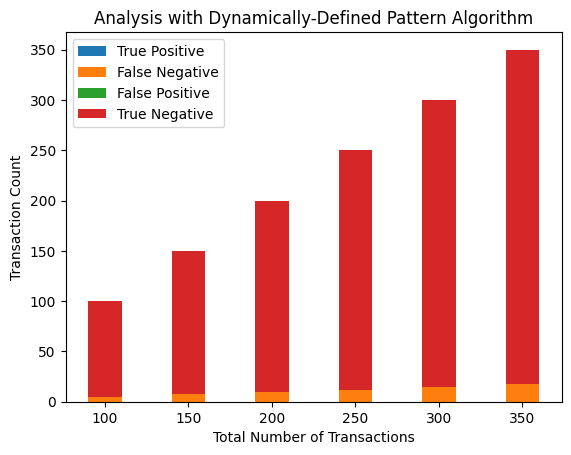

In [3]:
#graph the data

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print("Statistics for Predefined")
print(f"    Accuracies: {predefined_accuracies}")
print(f"    Precisions: {predefined_precisions}")
print(f"    Recalls: {predefined_recalls}")
print(f"    F1's: {predefined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {predefined_good_nonflagged}")
print(f"    False Positives: {predefined_good_flagged}")
print(f"    False Negatives: {predefined_bad_nonflagged}")
print(f"    True Positives: {predefined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Transactions')
plt.ylabel('Transaction Count')
plt.title('Analysis with Pre-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print("Statistics for Dynamically-Defined")
print(f"    Accuracies: {defined_accuracies}")
print(f"    Precisions: {defined_precisions}")
print(f"    Recalls: {defined_recalls}")
print(f"    F1's: {defined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {defined_good_nonflagged}")
print(f"    False Positives: {defined_good_flagged}")
print(f"    False Negatives: {defined_bad_nonflagged}")
print(f"    True Positives: {defined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Transactions')
plt.ylabel('Transaction Count')
plt.title('Analysis with Dynamically-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()
 


# Varying number of data items

In [4]:
#collect and organize data
num_transactions=200
min_ops_per_transaction = 10
max_ops_per_transaction = 12

#varying num data items
starting_index = 100
increment_amount = 50
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=starting_index+i*increment_amount, num_transactions=num_transactions, min_ops_per_transaction=min_ops_per_transaction, max_ops_per_transaction=max_ops_per_transaction))
    x_axis_values.append(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

#statistics for defined
defined_accuracies = []
defined_precisions = []
defined_recalls = []
defined_F1s = []

for i in range(num_groupings):
    good_nonflagged = defined_good_nonflagged[i]
    good_flagged = defined_good_flagged[i]
    bad_nonflagged = defined_bad_nonflagged[i]
    bad_flagged = defined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if (isinstance(recall, float)) and (isinstance(precision, float)):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    defined_accuracies.append(accuracy)
    defined_precisions.append(precision)
    defined_recalls.append(recall)
    defined_F1s.append(F1)

#statistics for defined
predefined_accuracies = []
predefined_precisions = []
predefined_recalls = []
predefined_F1s = []

for i in range(num_groupings):
    good_nonflagged = predefined_good_nonflagged[i]
    good_flagged = predefined_good_flagged[i]
    bad_nonflagged = predefined_bad_nonflagged[i]
    bad_flagged = predefined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if (isinstance(recall, float)) and (isinstance(precision, float)):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    predefined_accuracies.append(accuracy)
    predefined_precisions.append(precision)
    predefined_recalls.append(recall)
    predefined_F1s.append(F1)

Pre-Defined:
True Negatives: [181, 179, 187, 182, 180, 180]
False Positives: [9, 11, 3, 8, 10, 10]
False Negatives: [0, 0, 0, 0, 0, 0]
True Positives: [10, 10, 10, 10, 10, 10]

Dynamically Defined:
True Negatives: [7, 1, 0, 0, 0, 0]
False Positives: [183, 189, 190, 190, 190, 190]
False Negatives: [1, 0, 0, 0, 0, 0]
True Positives: [9, 10, 10, 10, 10, 10]


Statistics for Predefined
    Accuracies: [0.95, 0.94, 0.98, 0.96, 0.95, 0.95]
    Precisions: [0.53, 0.48, 0.77, 0.56, 0.5, 0.5]
    Recalls: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
    F1's: [0.69, 0.65, 0.87, 0.72, 0.67, 0.67]
Actual values in graph:
    True Negatives: [181, 179, 187, 182, 180, 180]
    False Positives: [9, 11, 3, 8, 10, 10]
    False Negatives: [0, 0, 0, 0, 0, 0]
    True Positives: [10, 10, 10, 10, 10, 10]


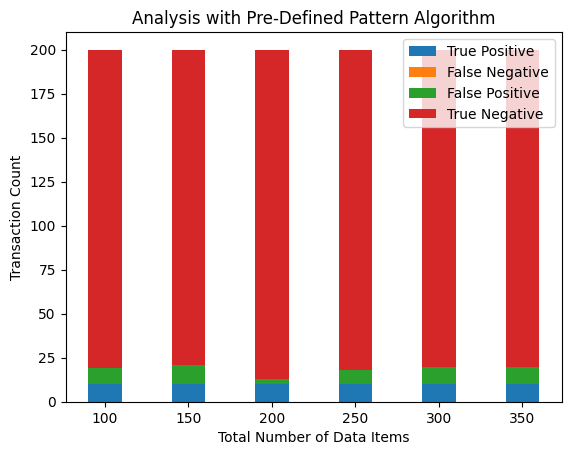

Statistics for Dynamically-Defined
    Accuracies: [0.08, 0.06, 0.05, 0.05, 0.05, 0.05]
    Precisions: [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
    Recalls: [0.9, 1.0, 1.0, 1.0, 1.0, 1.0]
    F1's: [0.09, 0.1, 0.1, 0.1, 0.1, 0.1]
Actual values in graph:
    True Negatives: [7, 1, 0, 0, 0, 0]
    False Positives: [183, 189, 190, 190, 190, 190]
    False Negatives: [1, 0, 0, 0, 0, 0]
    True Positives: [9, 10, 10, 10, 10, 10]


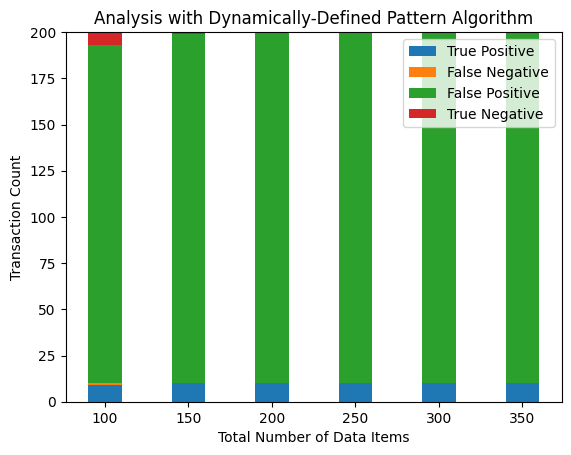

In [5]:
#graph the data

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print("Statistics for Predefined")
print(f"    Accuracies: {predefined_accuracies}")
print(f"    Precisions: {predefined_precisions}")
print(f"    Recalls: {predefined_recalls}")
print(f"    F1's: {predefined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {predefined_good_nonflagged}")
print(f"    False Positives: {predefined_good_flagged}")
print(f"    False Negatives: {predefined_bad_nonflagged}")
print(f"    True Positives: {predefined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Data Items')
plt.ylabel('Transaction Count')
plt.title('Analysis with Pre-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print("Statistics for Dynamically-Defined")
print(f"    Accuracies: {defined_accuracies}")
print(f"    Precisions: {defined_precisions}")
print(f"    Recalls: {defined_recalls}")
print(f"    F1's: {defined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {defined_good_nonflagged}")
print(f"    False Positives: {defined_good_flagged}")
print(f"    False Negatives: {defined_bad_nonflagged}")
print(f"    True Positives: {defined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 20

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Total Number of Data Items')
plt.ylabel('Transaction Count')
plt.title('Analysis with Dynamically-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

# Varying Number of Operations per Transaction

In [6]:
#collect and organize data 
num_transactions=200
num_data_items = 100

#varying num of ops per transaction
starting_index = 5
increment_amount = 5
num_groupings = 6

groupings = []
x_axis_values = []
for i in range(num_groupings):
    groupings.append(get_results(num_data_items=num_data_items, num_transactions=num_transactions, min_ops_per_transaction=starting_index+i*increment_amount, max_ops_per_transaction=starting_index+i*increment_amount))
    x_axis_values.append(starting_index+i*increment_amount)
    print(starting_index+i*increment_amount)


defined_good_nonflagged = get_values_for_key(groupings, "defined_good_nonflagged")
defined_good_flagged = get_values_for_key(groupings, "defined_good_flagged")
defined_bad_nonflagged = get_values_for_key(groupings, "defined_bad_nonflagged")
defined_bad_flagged = get_values_for_key(groupings, "defined_bad_flagged")
predefined_good_nonflagged = get_values_for_key(groupings, "predefined_good_nonflagged")
predefined_good_flagged = get_values_for_key(groupings, "predefined_good_flagged")
predefined_bad_nonflagged = get_values_for_key(groupings, "predefined_bad_nonflagged")
predefined_bad_flagged = get_values_for_key(groupings, "predefined_bad_flagged")

print("Pre-Defined:")
print(f"True Negatives: {predefined_good_nonflagged}")
print(f"False Positives: {predefined_good_flagged}")
print(f"False Negatives: {predefined_bad_nonflagged}")
print(f"True Positives: {predefined_bad_flagged}")
print()
print("Dynamically Defined:")
print(f"True Negatives: {defined_good_nonflagged}")
print(f"False Positives: {defined_good_flagged}")
print(f"False Negatives: {defined_bad_nonflagged}")
print(f"True Positives: {defined_bad_flagged}")

#statistics for defined
defined_accuracies = []
defined_precisions = []
defined_recalls = []
defined_F1s = []

for i in range(num_groupings):
    good_nonflagged = defined_good_nonflagged[i]
    good_flagged = defined_good_flagged[i]
    bad_nonflagged = defined_bad_nonflagged[i]
    bad_flagged = defined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if (isinstance(recall, float)) and (isinstance(precision, float)):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    defined_accuracies.append(accuracy)
    defined_precisions.append(precision)
    defined_recalls.append(recall)
    defined_F1s.append(F1)

#statistics for defined
predefined_accuracies = []
predefined_precisions = []
predefined_recalls = []
predefined_F1s = []

for i in range(num_groupings):
    good_nonflagged = predefined_good_nonflagged[i]
    good_flagged = predefined_good_flagged[i]
    bad_nonflagged = predefined_bad_nonflagged[i]
    bad_flagged = predefined_bad_flagged[i]
    accuracy, precision, recall, F1 = 0.00, 0.00, 0.00, 0.00

    if bad_flagged + bad_nonflagged + good_flagged + good_nonflagged != 0:
        accuracy = round((bad_flagged + good_nonflagged)/(bad_flagged + bad_nonflagged + good_flagged + good_nonflagged),2)
    else:
        accuracy = "NA, divide by 0"
    if bad_flagged + good_flagged != 0:
        precision = round((bad_flagged)/(bad_flagged + good_flagged),2)
    else:
        precision = "NA, divide by 0"
    if bad_flagged + bad_nonflagged != 0:
        recall = round((bad_flagged)/(bad_flagged + bad_nonflagged),2)
    else:
        recall = "NA, divide by 0"
    if (isinstance(recall, float)) and (isinstance(precision, float)):
        F1 = round((2*(recall * precision))/(recall + precision),2)
    else:
        F1 = "NA, divide by 0"
    
    predefined_accuracies.append(accuracy)
    predefined_precisions.append(precision)
    predefined_recalls.append(recall)
    predefined_F1s.append(F1)

5
10
15
20
25
30
Pre-Defined:
True Negatives: [183, 184, 184, 184, 182, 179]
False Positives: [7, 6, 6, 6, 8, 11]
False Negatives: [0, 0, 0, 0, 1, 1]
True Positives: [10, 10, 10, 10, 9, 9]

Dynamically Defined:
True Negatives: [0, 5, 47, 162, 190, 190]
False Positives: [190, 185, 143, 28, 0, 0]
False Negatives: [0, 0, 2, 9, 10, 10]
True Positives: [10, 10, 8, 1, 0, 0]


Statistics for Predefined
    Accuracies: [0.96, 0.97, 0.97, 0.97, 0.95, 0.94]
    Precisions: [0.59, 0.62, 0.62, 0.62, 0.53, 0.45]
    Recalls: [1.0, 1.0, 1.0, 1.0, 0.9, 0.9]
    F1's: [0.74, 0.77, 0.77, 0.77, 0.67, 0.6]
Actual values in graph:
    True Negatives: [183, 184, 184, 184, 182, 179]
    False Positives: [7, 6, 6, 6, 8, 11]
    False Negatives: [0, 0, 0, 0, 1, 1]
    True Positives: [10, 10, 10, 10, 9, 9]


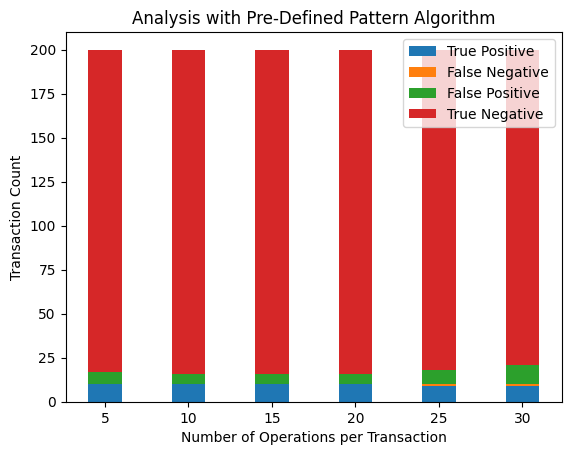

Statistics for Dynamically-Defined
    Accuracies: [0.05, 0.07, 0.28, 0.81, 0.95, 0.95]
    Precisions: [0.05, 0.05, 0.05, 0.03, 'NA, divide by 0', 'NA, divide by 0']
    Recalls: [1.0, 1.0, 0.8, 0.1, 0.0, 0.0]
    F1's: [0.1, 0.1, 0.09, 0.05, 'NA, divide by 0', 'NA, divide by 0']
Actual values in graph:
    True Negatives: [0, 5, 47, 162, 190, 190]
    False Positives: [190, 185, 143, 28, 0, 0]
    False Negatives: [0, 0, 2, 9, 10, 10]
    True Positives: [10, 10, 8, 1, 0, 0]


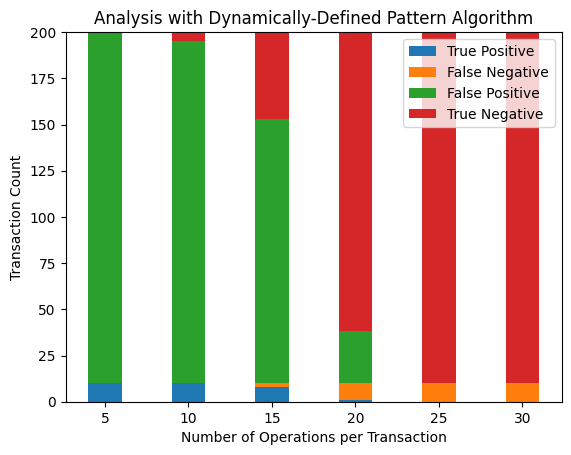

In [7]:
#graph the data

df = pd.DataFrame(dict(
    True_Negative = predefined_good_nonflagged,
    False_Positive = predefined_good_flagged,
    False_Negative = predefined_bad_nonflagged,
    True_Positive = predefined_bad_flagged))

print("Statistics for Predefined")
print(f"    Accuracies: {predefined_accuracies}")
print(f"    Precisions: {predefined_precisions}")
print(f"    Recalls: {predefined_recalls}")
print(f"    F1's: {predefined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {predefined_good_nonflagged}")
print(f"    False Positives: {predefined_good_flagged}")
print(f"    False Negatives: {predefined_bad_nonflagged}")
print(f"    True Positives: {predefined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 2

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Number of Operations per Transaction')
plt.ylabel('Transaction Count')
plt.title('Analysis with Pre-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()

#graph the data for no pre-defined patterns

df = pd.DataFrame(dict(
    True_Negative = defined_good_nonflagged,
    False_Positive = defined_good_flagged,
    False_Negative = defined_bad_nonflagged,
    True_Positive = defined_bad_flagged))

print("Statistics for Dynamically-Defined")
print(f"    Accuracies: {defined_accuracies}")
print(f"    Precisions: {defined_precisions}")
print(f"    Recalls: {defined_recalls}")
print(f"    F1's: {defined_F1s}")
print("Actual values in graph:")
print(f"    True Negatives: {defined_good_nonflagged}")
print(f"    False Positives: {defined_good_flagged}")
print(f"    False Negatives: {defined_bad_nonflagged}")
print(f"    True Positives: {defined_bad_flagged}")

# X-axis values
x_values = x_axis_values

# Bar width
bar_width = 2

# Plotting with thicker bars
plt.bar(x_values, df['True_Positive'], width=bar_width, label='True Positive')
plt.bar(x_values, df['False_Negative'], bottom=df['True_Positive'], width=bar_width, label='False Negative')
plt.bar(x_values, df['False_Positive'], bottom=df['True_Positive'] + df['False_Negative'], width=bar_width, label='False Positive')
plt.bar(x_values, df['True_Negative'], bottom=df['True_Positive'] + df['False_Negative'] + df['False_Positive'], width=bar_width, label='True Negative')

# Adding labels and legend
plt.xlabel('Number of Operations per Transaction')
plt.ylabel('Transaction Count')
plt.title('Analysis with Dynamically-Defined Pattern Algorithm')
plt.legend()

# Display the plot
plt.show()